In [2]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

**Filtro Passa-Baixa**

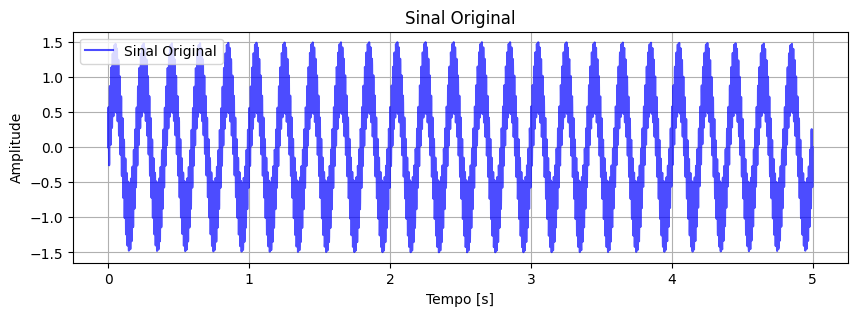

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Geração dos sinais
def gera_sinais(time, baixa_freq, alta_freq, sampling_rate=1000):
    # Vetor de tempo
    t = np.linspace(0, time, int(time * sampling_rate))

    # Sinal composto por baixa frequência e alta frequência
    signal = np.sin(2 * np.pi * baixa_freq * t) + 0.5 * np.sin(2 * np.pi * alta_freq * t)

    return t, signal

# Filtro passa-baixa via FFT
def filtro_passa_baixa(signal, freq_corte, sampling_rate=1000):
    # Transformada de Fourier do sinal
    fft_sinal = np.fft.fft(signal)
    frequencias = np.fft.fftfreq(len(signal), 1 / sampling_rate)

    # Filtragem (mantém frequências <= freq_corte)
    fft_sinal_filtrado = fft_sinal * (np.abs(frequencias) <= freq_corte)

    # Sinal filtrado (transformada inversa de Fourier)
    sinal_filtrado = np.fft.ifft(fft_sinal_filtrado).real

    return sinal_filtrado

# Parâmetros
time = 5  # Duração em segundos
sampling_rate = 1000  # Taxa de amostragem
baixa_f = 5  # Frequência baixa (Hz)
alta_f = 100  # Frequência alta (Hz)
freq_corte = 50  # Frequência de corte do filtro (Hz)

# Geração e filtragem do sinal
t, sinal = gera_sinais(time, baixa_f, alta_f, sampling_rate)
sinal_filtrado = filtro_passa_baixa(sinal, freq_corte, sampling_rate)

# Plotagem
plt.figure(figsize=(10, 3))

# Gráfico 1: Sinal original no domínio do tempo

plt.plot(t, sinal, color='b',alpha=0.7, label='Sinal Original')
plt.title('Sinal Original')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()




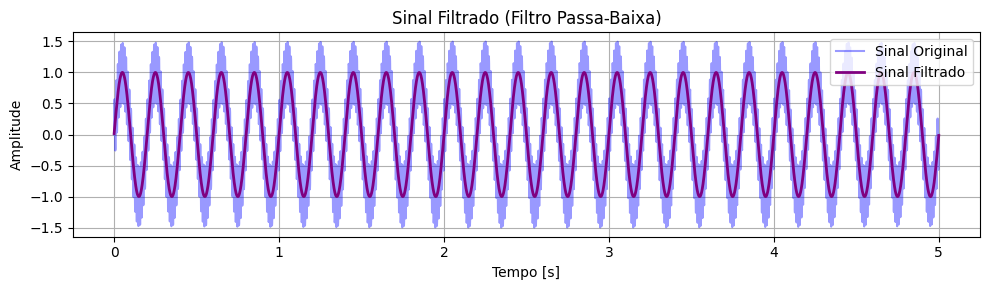

In [4]:
# Gráfico 2: Sinal filtrado no domínio do tempo
plt.figure(figsize=(10, 3))
plt.plot(t, sinal, color='b', alpha=0.4, label='Sinal Original')
plt.plot(t, sinal_filtrado, color='purple', linewidth=2, label='Sinal Filtrado')
plt.title('Sinal Filtrado (Filtro Passa-Baixa)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

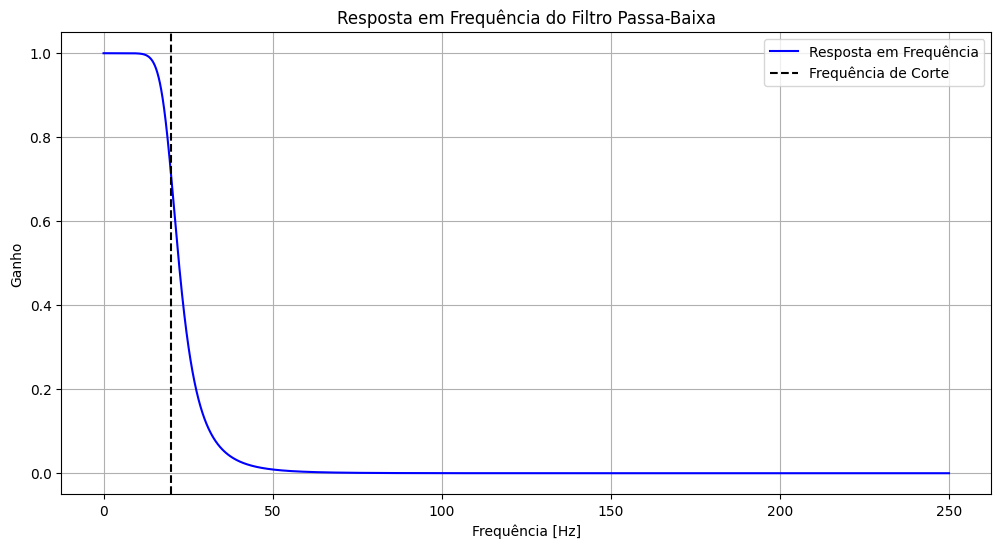

In [5]:

# Filtro Butterworth Passa-Baixa
def butter_passa_baixa(cutoff, fs, order=5):
    nyq = 0.5 * fs  # Frequência de Nyquist
    normal_cutoff = cutoff / nyq  # Normalização da frequência de corte
    b, a = butter(order, normal_cutoff, btype="low", analog=False)  # Coeficientes do filtro
    return b, a

def butter_passa_baixa_filtro(data, cutoff, fs, order=5):
    b, a = butter_passa_baixa(cutoff, fs, order)
    y = lfilter(b, a, data)  # Aplica o filtro ao sinal
    return y

# Parâmetros do Sinal e Filtro
# Parâmetros ajustados
time = 5               # Duração em segundos
sampling_rate = 500    # Taxa de amostragem (Hz)
baixa_f = 10           # Frequência baixa (Hz)
alta_f = 100           # Frequência alta (Hz)
freq_corte = 20        # Frequência de corte do filtro (Hz)
order = 5              # Ordem do filtro


# Geração do sinal
t, sinal = gera_sinais(time, baixa_f, alta_f, sampling_rate)

# Filtragem do sinal usando filtro Butterworth
sinal_filtrado = butter_passa_baixa_filtro(sinal, freq_corte, sampling_rate, order)

# Resposta em frequência do filtro
b, a = butter_passa_baixa(freq_corte, sampling_rate, order)
w, h = freqz(b, a, worN=8000)

# Plotagem
plt.figure(figsize=(12, 6))
plt.plot(0.5 * sampling_rate * w / np.pi, np.abs(h), "b", label="Resposta em Frequência")
plt.axvline(freq_corte, color="k", linestyle="--", label="Frequência de Corte")
plt.title("Resposta em Frequência do Filtro Passa-Baixa")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Ganho")
plt.grid()
plt.legend()



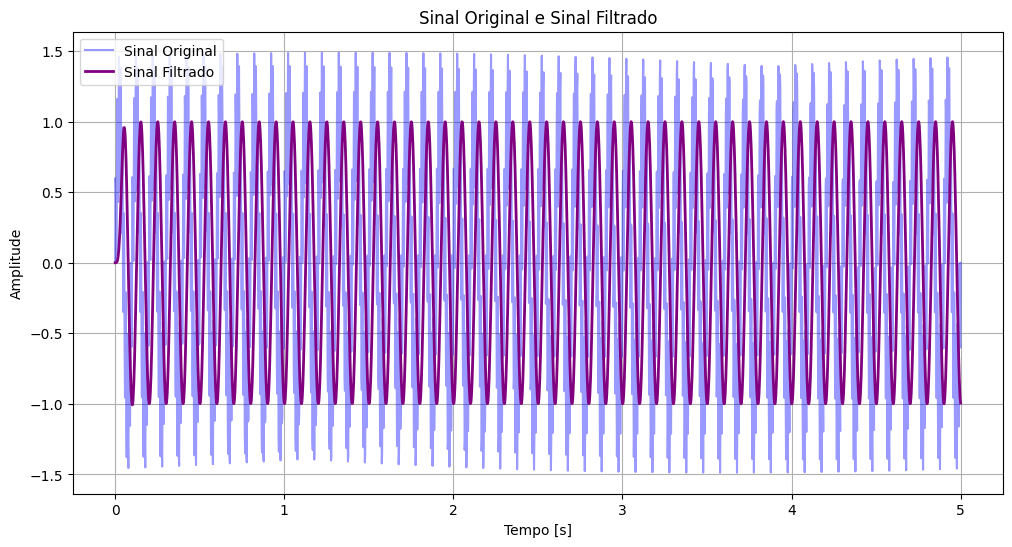

In [6]:
# Gráfico 2: Sinal Original vs Sinal Filtrado
plt.figure(figsize=(12, 6))
plt.plot(t, sinal, "b",alpha=0.4, label="Sinal Original")
plt.plot(t, sinal_filtrado, "purple", linewidth=2, label="Sinal Filtrado")
plt.title("Sinal Original e Sinal Filtrado")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

**Filtro Passa-Alta**

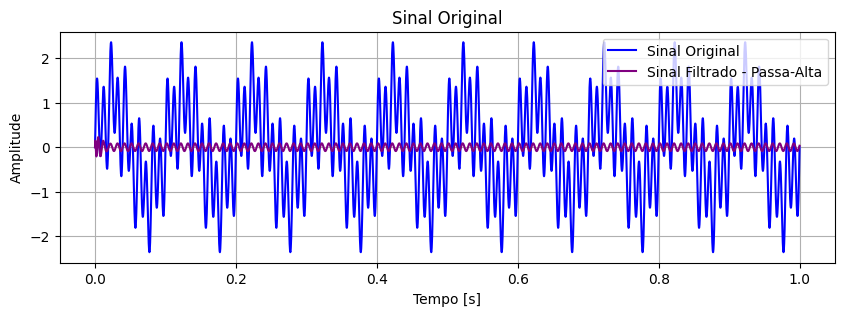

In [7]:
# Geração dos sinais
def butter_altaf(corte, fs, ordem = 5):
  nyq = 0.5 * fs
  corte_normalizado =  corte / nyq

  #coeficiente do butter
  b,a = butter(ordem, corte_normalizado, btype="high", analog = False)

  return b, a


# Filtro passa-baixa via FFT
def butter_filtro_passa_alta(dado, corte, freq, ordem=5):
    b, a = butter_altaf(corte, freq, ordem=ordem) #dados brutos
    y =  lfilter(b,a,dado) #filtrando

    return y


# Parâmetros
fs = 5000
t = np.linspace(0,1,fs) #1s do sinal
#projetando um sinal cheio de ruidos
sinal = np.sin(2*np.pi *10*  t) +  0.5*np.sin(2*np.pi * 50 * t)+ np.sin(2*np.pi * 100 * t)
corte = 150.0

y =  butter_filtro_passa_alta(sinal, corte, fs, ordem=6)
# Plotagem
plt.figure(figsize=(10, 3))

# Gráfico 1: Sinal original no domínio do tempo

plt.plot(t, sinal, color='b', label='Sinal Original')
plt.plot(t, y, color='purple', label='Sinal Filtrado - Passa-Alta')
plt.title('Sinal Original')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()




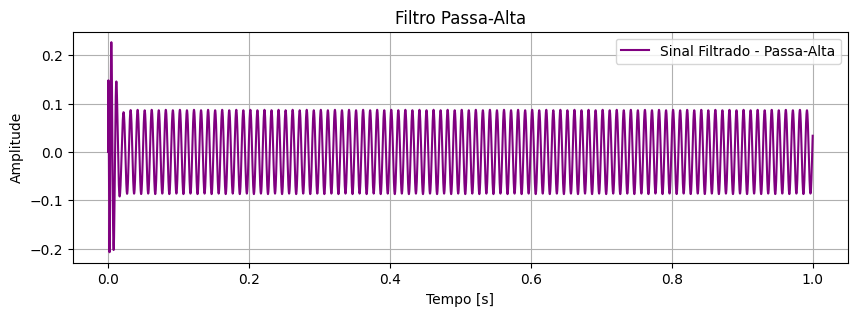

In [8]:
# Gráfico 2: Sinal filtrado
plt.figure(figsize=(10, 3))
#plt.plot(t, sinal, color='b',alpha=0.4, label='Sinal Filtrado - Passa-Alta')
plt.plot(t, y, color='purple', label='Sinal Filtrado - Passa-Alta')
plt.title('Filtro Passa-Alta')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)
#plt.axis('tight')
plt.legend()

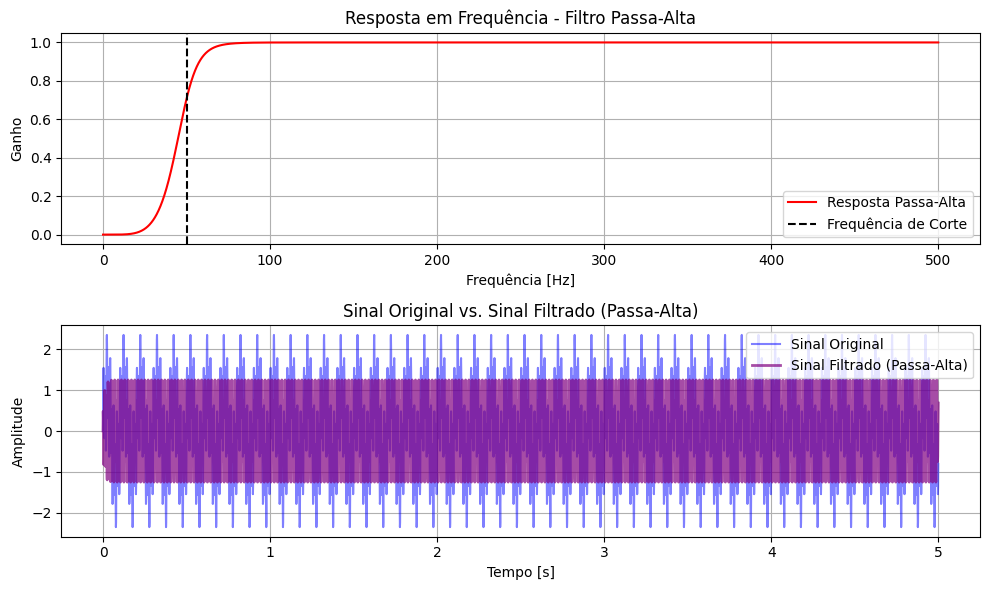

In [9]:
# Geração dos sinais
def gera_sinais(time, baixa_freq, alta_freq, sampling_rate=1000):
    # Vetor de tempo
    t = np.linspace(0, time, int(time * sampling_rate), endpoint=False)

    # Sinal composto por baixa frequência e alta frequência
    signal = np.sin(2*np.pi *10*  t) +  0.5*np.sin(2*np.pi * 50 * t)+ np.sin(2*np.pi * 100 * t)
    return t, signal

# Filtro Butterworth Passa-Alta
def butter_passa_alta(cutoff, fs, order=5):
    nyq = 0.5 * fs  # Frequência de Nyquist
    normal_cutoff = cutoff / nyq  # Normalização da frequência de corte
    b, a = butter(order, normal_cutoff, btype="high", analog=False)  # Coeficientes do filtro
    return b, a

def butter_passa_alta_filtro(data, cutoff, fs, order=5):
    b, a = butter_passa_alta(cutoff, fs, order)
    y = lfilter(b, a, data)  # Aplica o filtro ao sinal
    return y

# Parâmetros
time = 5  # Duração em segundos
sampling_rate = 1000  # Taxa de amostragem
baixa_f = 5  # Frequência baixa (Hz)
alta_f = 100  # Frequência alta (Hz)
freq_corte = 50  # Frequência de corte do filtro passa-alta (Hz)
order = 5  # Ordem do filtro

# Geração do sinal
t, sinal = gera_sinais(time, baixa_f, alta_f, sampling_rate)

# Aplicação do filtro passa-alta
sinal_passa_alta = butter_passa_alta_filtro(sinal, freq_corte, sampling_rate, order)

# Resposta em frequência do filtro passa-alta
b, a = butter_passa_alta(freq_corte, sampling_rate, order)
w, h = freqz(b, a, worN=8000)

# Plotagem
plt.figure(figsize=(10, 6))

# Gráfico 1: Resposta em frequência do filtro passa-alta
plt.subplot(2, 1, 1)
plt.plot(0.5 * sampling_rate * w / np.pi, np.abs(h), "r", label="Resposta Passa-Alta")
plt.axvline(freq_corte, color="k", linestyle="--", label="Frequência de Corte")
plt.title("Resposta em Frequência - Filtro Passa-Alta")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Ganho")
plt.grid()
plt.legend()

# Gráfico 2: Sinal original e sinal filtrado
plt.subplot(2, 1, 2)
plt.plot(t, sinal, "b-", label="Sinal Original", alpha=0.5)
plt.plot(t, sinal_passa_alta, "purple",alpha=0.7, linewidth=2, label="Sinal Filtrado (Passa-Alta)")
plt.title("Sinal Original vs. Sinal Filtrado (Passa-Alta)")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()